# Instructions:
---

1. Choose a data from https://archive.ics.uci.edu
2. Perform regression analysis on your chosen dataset

In [8]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_failure_clinical_records = fetch_ucirepo(id=519) 
  
# data (as pandas dataframes) 
X = heart_failure_clinical_records.data.features 
y = heart_failure_clinical_records.data.targets 
  
# metadata 
print(heart_failure_clinical_records.metadata) 
  
# variable information 
print(heart_failure_clinical_records.variables) 

{'uci_id': 519, 'name': 'Heart Failure Clinical Records', 'repository_url': 'https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records', 'data_url': 'https://archive.ics.uci.edu/static/public/519/data.csv', 'abstract': 'This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 299, 'num_features': 12, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['death_event'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5Z89R', 'creators': [], 'intro_paper': {'title': 'Machine learning can predict survival of patients with heart failure from serum creatinine and ejec

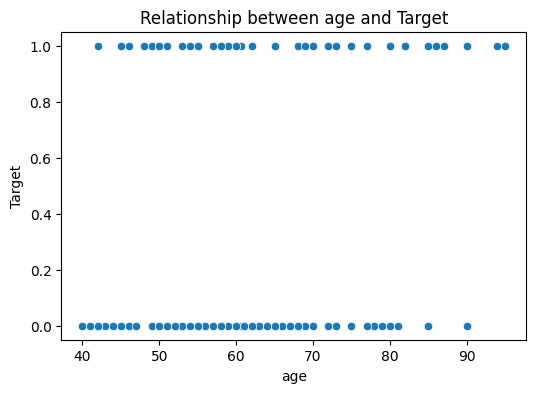

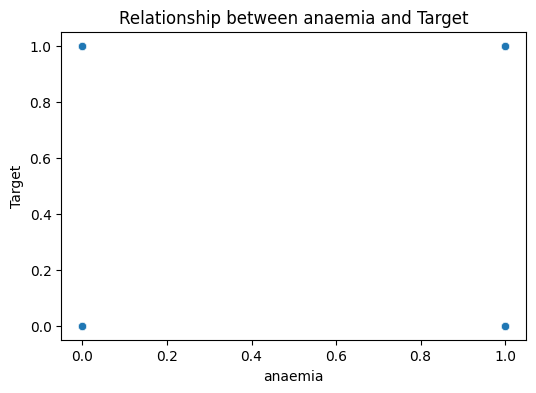

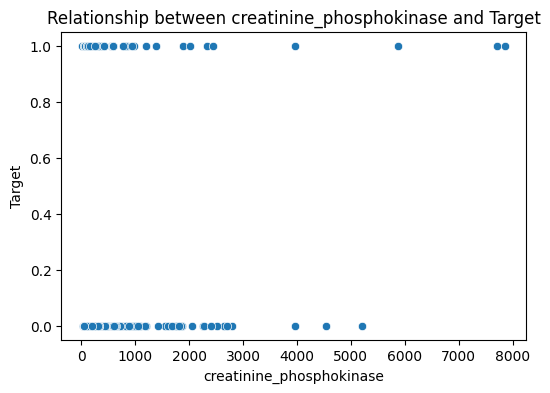

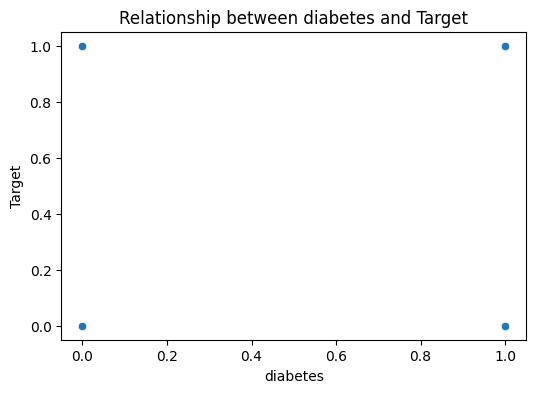

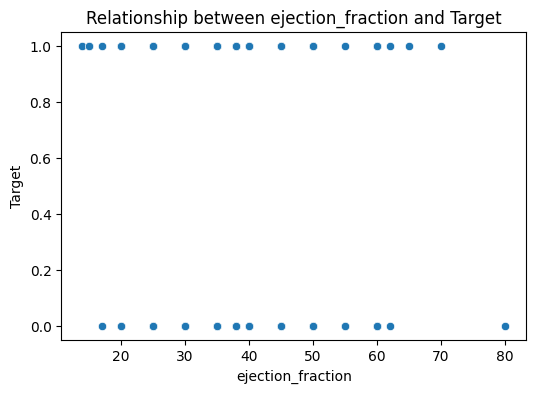

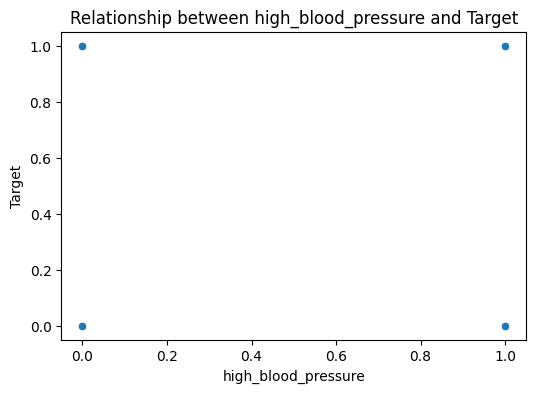

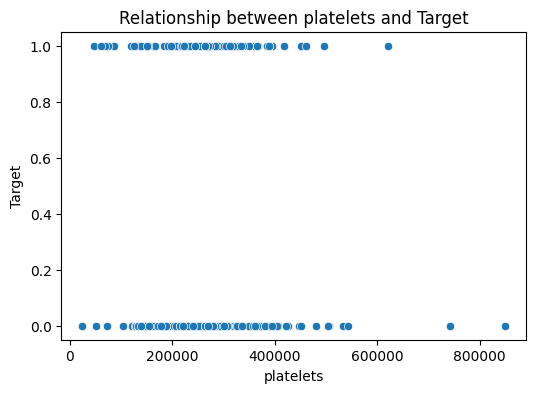

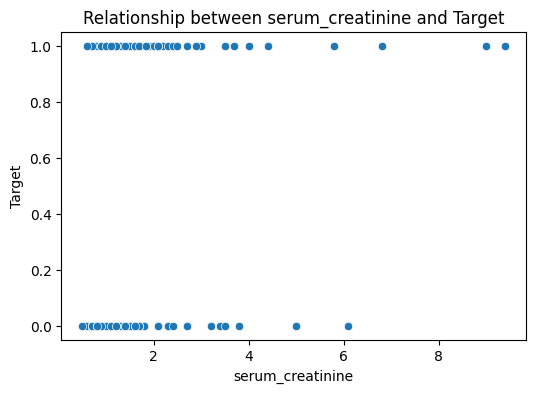

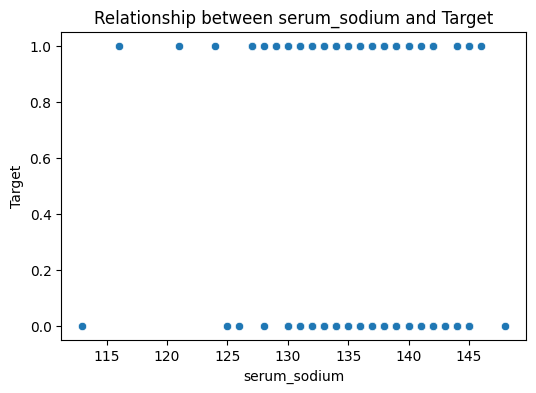

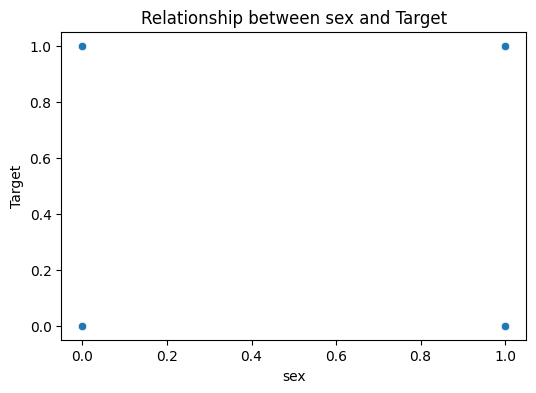

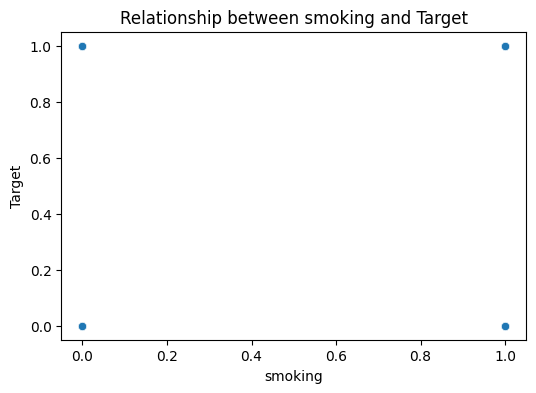

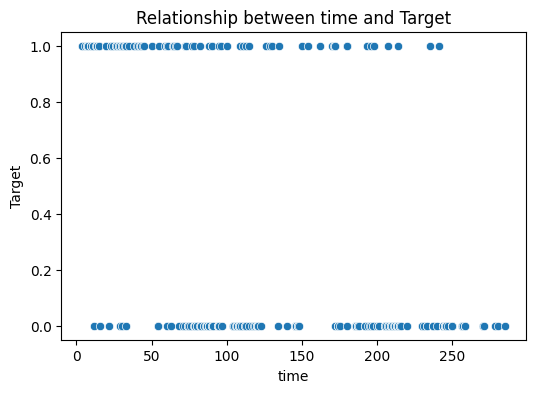

Mean Squared Error: 0.17868807219102273
R-squared: 0.2648262172712207
                     Feature    Importance
7           serum_creatinine  1.071139e-01
3                   diabetes  3.740270e-02
10                   smoking  1.729181e-02
0                        age  6.304612e-03
2   creatinine_phosphokinase  1.658588e-05
6                  platelets -6.360406e-08
11                      time -2.672763e-03
8               serum_sodium -5.683452e-03
4          ejection_fraction -9.021141e-03
1                    anaemia -1.458543e-02
5        high_blood_pressure -2.203238e-02
9                        sex -8.718761e-02


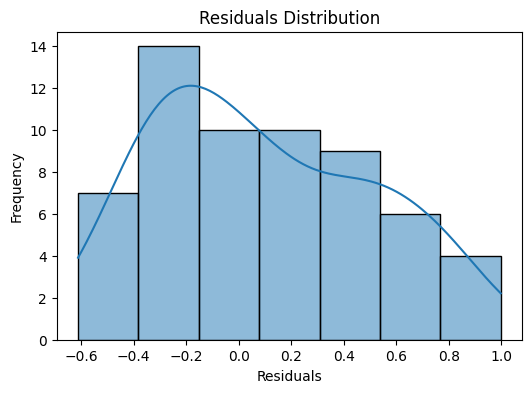

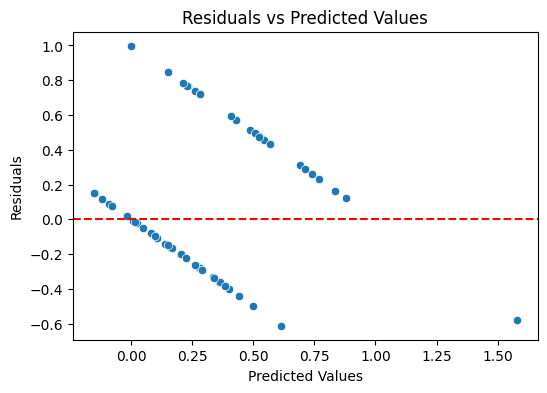

In [7]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Fetch dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

# Data
X = heart_failure_clinical_records.data.features
y = heart_failure_clinical_records.data.targets

# Convert 'y' to a 1D array if it is not already
y = y.values.ravel()

# Visualizing the relationship between features and the target
for column in X.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X[column], y=y)
    plt.title(f'Relationship between {column} and Target')
    plt.xlabel(column)
    plt.ylabel('Target')
    plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a regression model (e.g., Linear Regression)
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Feature importance
importance = model.coef_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
print(importance_df.sort_values(by='Importance', ascending=False))

# Residual analysis
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
